### Keras MLP

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Classification - Sequantial

In [2]:
### fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [185]:
x_train_full.shape

(60000, 28, 28)

In [186]:
x_train_full.dtype

dtype('uint8')

In [187]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

In [188]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [189]:
print(x_valid.shape, x_test.shape)

(5000, 28, 28) (10000, 28, 28)


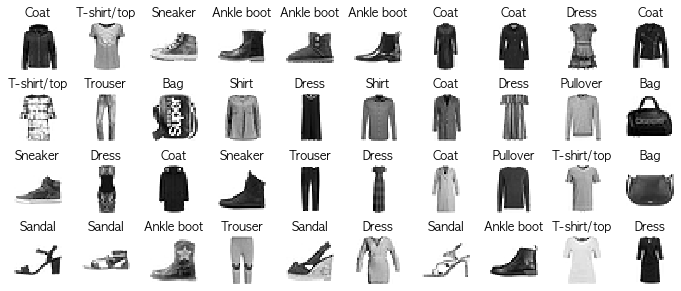

In [190]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [191]:
### Keras model 사전 준비
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [192]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # multiclass. 이진 분류는 sigmoid
])

In [193]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


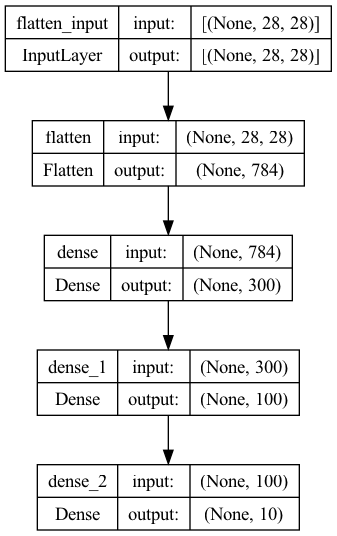

In [194]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [195]:
model.layers

In [196]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [197]:
model.get_layer(hidden1.name)

In [198]:
weights, biases = hidden1.get_weights()

In [199]:
weights

array([[-0.03132319,  0.06730466,  0.05195457, ...,  0.05375986,
        -0.0143573 ,  0.00214025],
       [-0.02344082,  0.07374844, -0.03953264, ...,  0.02333508,
        -0.0201835 , -0.01382552],
       [-0.06497259, -0.04412328, -0.04143219, ..., -0.07317684,
         0.03030817,  0.0163158 ],
       ...,
       [ 0.0322013 ,  0.03224345, -0.03620961, ...,  0.03135347,
         0.04081599,  0.00933595],
       [-0.04629944, -0.04325782,  0.04530523, ..., -0.04455006,
         0.03533125,  0.02763941],
       [-0.01368078, -0.04788312,  0.04295353, ...,  0.00795731,
         0.01961097,  0.04541215]], dtype=float32)

In [200]:
weights.shape

(784, 300)

In [201]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [202]:
biases.shape

(300,)

In [203]:
### Complie model
model.compile(loss="sparse_categorical_crossentropy", # 배타적인 멀티 클래스. one-hot vector의 경우 categorical_crossentropy 사용
              optimizer="sgd", # 
              metrics=["accuracy"])

In [204]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid)) # validataion_split=0.1 등으로도 validation 분할 가능

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7263 - accuracy: 0.7622 - val_loss: 0.5278 - val_accuracy: 0.8190
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4885 - accuracy: 0.8292 - val_loss: 0.4375 - val_accuracy: 0.8516
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8448 - val_loss: 0.5361 - val_accuracy: 0.8022
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8559 - val_loss: 0.3943 - val_accuracy: 0.8640
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3947 - accuracy: 0.8628 - val_loss: 0.3784 - val_accuracy: 0.8690
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8680 - val_loss: 0.3720 - val_accuracy: 0.8714
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3636 - accuracy: 0.8717 - val_loss: 0.3637 - val_accuracy:

In [205]:
print(history.params, history.epoch)

{'verbose': 1, 'epochs': 10, 'steps': 1719} [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [206]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

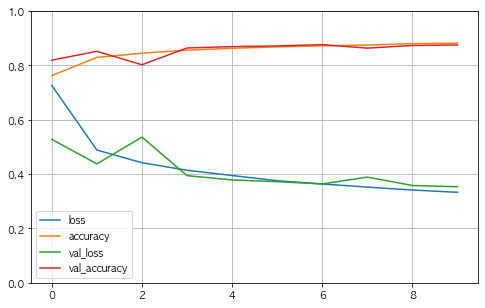

In [207]:
### history plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [208]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8582


[0.38813966512680054, 0.8582000136375427]

In [209]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.08, 0.  , 0.84],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [210]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1])

In [211]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [212]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

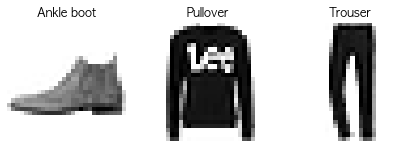

In [213]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Regression - Sequential

In [214]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

### scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [215]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [216]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3827 - val_loss: 0.9231
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7928 - val_loss: 0.7263
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7146 - val_loss: 0.7171
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6732 - val_loss: 0.6363
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6428 - val_loss: 0.6119
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6140 - val_loss: 0.6205
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5912 - val_loss: 0.6345
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5700 - val_loss: 0.5355
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5493 - val_loss: 0.5551
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - val_loss: 0.5794

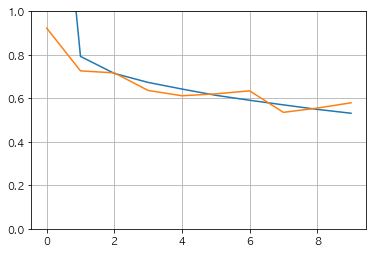

In [217]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [218]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[0.6498337],
       [1.4303262],
       [2.731399 ]], dtype=float32)

#### Functional API

In [219]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [220]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [221]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

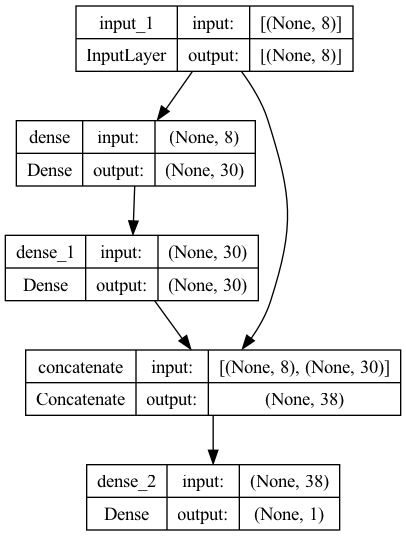

In [222]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [223]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
y_pred = model.predict(x_new)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7817 - val_loss: 0.8101
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6812 - val_loss: 0.6444
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6327 - val_loss: 0.6310
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6000 - val_loss: 0.5680
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5755 - val_loss: 0.5460
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5539 - val_loss: 0.5521
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5371 - val_loss: 0.5548
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5228 - val_loss: 0.4926
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5093 - val_loss: 0.5080
Epoch 10/10
1/1 [==============================] - 0s 58ms/step


In [224]:
### Multi input
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [225]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [226]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

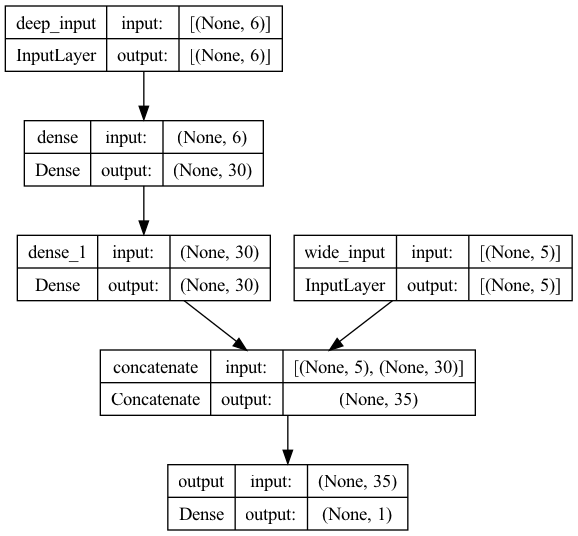

In [227]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [228]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

history = model.fit((x_train_A, x_train_B), y_train, epochs=10,
                    validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3784 - val_loss: 1.8679
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8743 - val_loss: 0.8153
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6758 - val_loss: 0.6118
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5451
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5431 - val_loss: 0.5012
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5096 - val_loss: 0.4721
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4855 - val_loss: 0.4502
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4693 - val_loss: 0.4346
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4570 - val_loss: 0.4256
Epoch 10/10
1/1 [==============================] - 0s 60ms/step


In [229]:
### Multi input and output
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [230]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

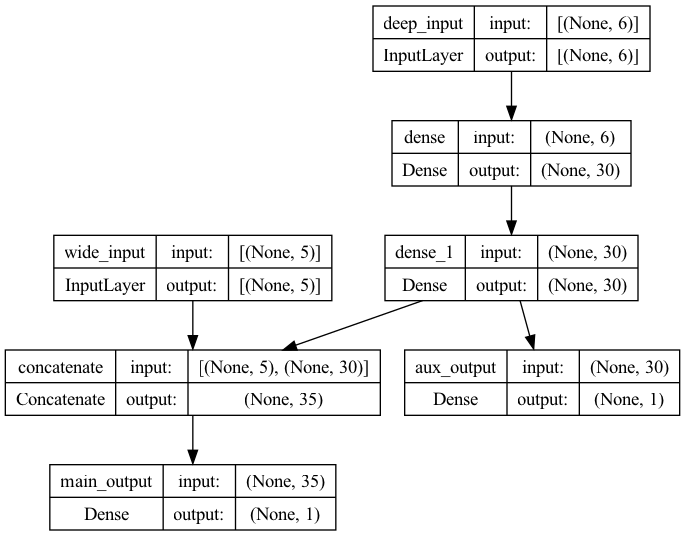

In [231]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [232]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # 출력마다 손실함수 정의

In [233]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=10,
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.5897 - main_output_loss: 2.1708 - aux_output_loss: 6.3590 - val_loss: 1.7078 - val_main_output_loss: 0.9642 - val_aux_output_loss: 8.3999
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1122 - main_output_loss: 0.7948 - aux_output_loss: 3.9690 - val_loss: 1.0511 - val_main_output_loss: 0.7350 - val_aux_output_loss: 3.8958
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8466 - main_output_loss: 0.6556 - aux_output_loss: 2.5659 - val_loss: 0.7686 - val_main_output_loss: 0.6022 - val_aux_output_loss: 2.2655
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7209 - main_output_loss: 0.5920 - aux_output_loss: 1.8818 - val_loss: 0.6650 - val_main_output_loss: 0.5527 - val_aux_output_loss: 1.6756
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6550 - main_output_loss: 0.5539 - aux_output_loss: 1.5654 - val_loss

In [234]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

1/1 [==============================] - 0s 67ms/step


#### Subclassing API
- 동적 네트워크 구조
- call() 메소드 안에 동작이 정의되므로 모델 복사가 어려움 (pickle 사용)

In [235]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): # 수행할 연산 기입
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [236]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10,
                    validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.9527 - output_1_loss: 2.6467 - output_2_loss: 5.7064 - val_loss: 1.6742 - val_output_1_loss: 1.2049 - val_output_2_loss: 5.8973
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2342 - output_1_loss: 0.9112 - output_2_loss: 4.1410 - val_loss: 1.3827 - val_output_1_loss: 0.9124 - val_output_2_loss: 5.6156
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9518 - output_1_loss: 0.7382 - output_2_loss: 2.8734 - val_loss: 1.1560 - val_output_1_loss: 0.6903 - val_output_2_loss: 5.3472
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8229 - output_1_loss: 0.6766 - output_2_loss: 2.1395 - val_loss: 1.0717 - val_output_1_loss: 0.6475 - val_output_2_loss: 4.8902
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7465 - output_1_loss: 0.6369 - output_2_loss: 1.7324 - val_loss: 0.9989 - val_output_1_loss: 0.6317 - val_ou

#### Model Save & Load
- Subclassing 사용 불가

In [237]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9587 - val_loss: 1.2864
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7586 - val_loss: 0.6922
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6640 - val_loss: 0.6553
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6105 - val_loss: 0.5806
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5717 - val_loss: 0.5492
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 0.5247
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5166 - val_loss: 0.5188
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4971 - val_loss: 0.4731
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4564
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4447


In [238]:
### save
model.save("my_keras_model.h5")

In [239]:
### load
model = keras.models.load_model("my_keras_model.h5")

In [240]:
model.predict(x_new)

1/1 [==============================] - 0s 57ms/step


array([[0.9030865],
       [1.4847943],
       [3.0969498]], dtype=float32)

In [241]:
### weight save & load
model.save_weights("my_keras_weights.ckpt")

In [242]:
model.load_weights("my_keras_weights.ckpt")

#### Callbacks
- Checkpoint 저장
- Early Stopping 적용

In [243]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [244]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [245]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1224 - val_loss: 1.2146
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6820 - val_loss: 0.5972
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5864 - val_loss: 0.5646
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5467 - val_loss: 0.5159
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5185 - val_loss: 0.4898
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4955 - val_loss: 0.4661
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 0.4561
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4640 - val_loss: 0.4381
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4526 - val_loss: 0.4252
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4373


In [246]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # Multi checkpoint

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4352 - val_loss: 0.4072
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4284 - val_loss: 0.4011
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4225 - val_loss: 0.3946
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4172 - val_loss: 0.3913
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4129 - val_loss: 0.3897
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4086 - val_loss: 0.3827
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4053 - val_loss: 0.3812
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4021 - val_loss: 0.3818
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3991 - val_loss: 0.3761
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3962 - val_loss: 0.3713

In [247]:
### Custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [248]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
339/363 [===========================>..] - ETA: 0s - loss: 0.3759
val/train: 0.94
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.3578
Epoch 2/2
347/363 [===========================>..] - ETA: 0s - loss: 0.3783
val/train: 0.95
363/363 [==============================] - 1s 2ms/step - loss: 0.3772 - val_loss: 0.3583


#### Hyperparameter Tuning

In [249]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [250]:
### build model with hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [251]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # build_model 함수를 이용하여 모델 생성

In [252]:
keras_reg.fit(x_train, y_train, epochs=50,
              validation_data=(x_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.2407 - val_loss: 5.7497
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.7375 - val_loss: 2.7932
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5984 - val_loss: 1.0284
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5369 - val_loss: 0.7132
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4952 - val_loss: 0.4435
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4690 - val_loss: 0.4518
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4529 - val_loss: 0.4088
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4411 - val_loss: 0.4127
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.3979
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4231 - val_loss: 0.4064

In [253]:
mse_test = keras_reg.score(x_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3820


-0.3820195496082306

In [254]:
y_pred = keras_reg.predict(x_new)
y_pred

1/1 [==============================] - 0s 52ms/step


array([0.81722325, 1.7251166 , 3.6776752 ], dtype=float32)

In [255]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [256]:
from scipy.stats import reciprocal

In [257]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 10).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(100).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(x_train, y_train, epochs=20,
                  validation_data=(x_valid, y_valid), # CV를 진행하므로 valid data는 Early stopping에만 사용
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/20
242/242 [==============================] - 1s 2ms/step - loss: 3.3117 - val_loss: 1.6686
Epoch 2/20
242/242 [==============================] - 0s 2ms/step - loss: 1.4216 - val_loss: 1.5175
Epoch 3/20
242/242 [==============================] - 0s 2ms/step - loss: 1.2709 - val_loss: 1.4544
Epoch 4/20
242/242 [==============================] - 0s 2ms/step - loss: 1.1689 - val_loss: 1.6561
Epoch 5/20
121/121 [==============================] - 0s 1ms/step - loss: 0.8983
[CV] END learning_rate=0.001621231156394198, n_hidden=3, n_neurons=9; total time=   3.2s
Epoch 1/20
242/242 [==============================] - 1s 3ms/step - loss: 2.7325 - val_loss: 3.6878
Epoch 2/20
242/242 [==============================] - 0s 2ms/step - loss: 1.2991 - val_loss: 2.5030
Epoch 3/20
242/242 [==============================] - 1s 2ms/step - loss: 0.9941 - val_loss: 1.5348
Epoch 4/20
242/242 [==============================] - 0s 2ms/step - l

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fada24598e0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00121788348

In [258]:
rnd_search_cv.best_params_

{'n_neurons': 7, 'n_hidden': 1, 'learning_rate': 0.01848314861814289}

In [259]:
rnd_search_cv.best_score_

-0.40317389369010925

In [260]:
rnd_search_cv.best_estimator_

In [261]:
rnd_search_cv.score(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4112


-0.4111534357070923

In [262]:
model = rnd_search_cv.best_estimator_.model # 최적 모델 저장
model

In [263]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4112


0.4111534357070923

#### Vanishing / Exploding Gradient
- Vanishing: 하위 층으로 갈수록 그레디언트가 점점 작아지는 것
- Exploding: 그레디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신

#####  Initalization
- Xavier(Glorot): 무작위 초기화
- He: ReLU 초기화

In [264]:
### He 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # 또는 he_uniform

In [265]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

##### Non-converging Activation Functions
- 그레디언트 소실/폭주를 줄이기 위한 방법
- LeakyReLU: ReLU와 비슷하지만, 음수 부분이 약간의 기울기를 가짐
     - alpha: 새는 정도. 보통 0.01로 설정
- RReLU: alpha를 train 동안 무작위 선택, test 시 평균
- PReLU: alpha가 train 동안 학습
- ELU (Exponential LU): aplha를 지수적으로 결정. 계산이 느린 편
- ScaledELU (SELU): 각 층의 출력을 평균 0, 표준편차 1로 표준화
    - lecun_normal로 initialization
    - 순차적 구조의 모든 은닉층에 사용하면 Self-normalize 가능
    - 성능이 가장 좋았음

In [266]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [267]:
### LeakyReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [268]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [269]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2815 - accuracy: 0.6084 - val_loss: 0.8661 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7812 - accuracy: 0.7450 - val_loss: 0.6931 - val_accuracy: 0.7796
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6684 - accuracy: 0.7833 - val_loss: 0.6266 - val_accuracy: 0.7952
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6107 - accuracy: 0.7990 - val_loss: 0.5743 - val_accuracy: 0.8158
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.8077 - val_loss: 0.5444 - val_accuracy: 0.8230
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5494 - accuracy: 0.8142 - val_loss: 0.5231 - val_accuracy: 0.8254
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5302 - accuracy: 0.8188 - val_loss: 0.5058 - val_accuracy:

In [270]:
### PReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [271]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [272]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2829 - accuracy: 0.6273 - val_loss: 0.8889 - val_accuracy: 0.7182
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7989 - accuracy: 0.7413 - val_loss: 0.7104 - val_accuracy: 0.7734
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6785 - accuracy: 0.7822 - val_loss: 0.6391 - val_accuracy: 0.7968
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6150 - accuracy: 0.8013 - val_loss: 0.5822 - val_accuracy: 0.8172
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5752 - accuracy: 0.8125 - val_loss: 0.5503 - val_accuracy: 0.8248
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5471 - accuracy: 0.8197 - val_loss: 0.5275 - val_accuracy: 0.8312
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5264 - accuracy: 0.8249 - val_loss: 0.5087 - val_accuracy:

In [273]:
### ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

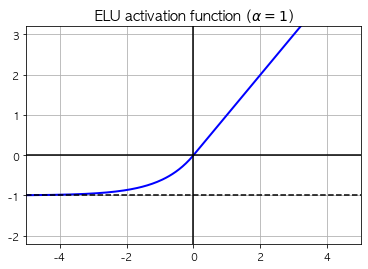

In [274]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [275]:
# keras.layers.Dense(10, activation="elu")

In [276]:
from scipy.special import erfc

In [277]:
### SELU
# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [278]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

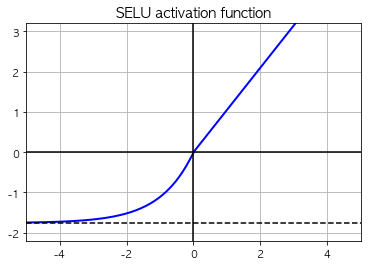

In [279]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [280]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [281]:
# keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [282]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [283]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [284]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [285]:
### input standardization
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)

x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [286]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 29s 13ms/step - loss: 1.5583 - accuracy: 0.3975 - val_loss: 1.1441 - val_accuracy: 0.5476
Epoch 2/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.9860 - accuracy: 0.6049 - val_loss: 0.8132 - val_accuracy: 0.6804
Epoch 3/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7489 - accuracy: 0.7123 - val_loss: 0.6982 - val_accuracy: 0.7002
Epoch 4/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.6532 - accuracy: 0.7576 - val_loss: 0.6075 - val_accuracy: 0.7808
Epoch 5/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5934 - accuracy: 0.7817 - val_loss: 0.5856 - val_accuracy: 0.7888


##### Batch Normalization
- Activation function 전에 연산 추가
- 정규화, 스케일 조정 및 이동
- 첫 번째 층에 추가하면 Train data를 scaling(표준화) 할 필요 없음
- 현재의 미니배치에서 평균과 표준편차 평가
- Test 할땐 최종 입력 평균과 표준편차 사용. 이동 평균으로 추정
- 연산이 추가되지만, 수렴 속도를 더 빠르게 할 수 있음

In [287]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [288]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_101 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_102 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [289]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [290]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [291]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8304 - accuracy: 0.7200 - val_loss: 0.5418 - val_accuracy: 0.8206
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.8031 - val_loss: 0.4696 - val_accuracy: 0.8398
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5094 - accuracy: 0.8229 - val_loss: 0.4398 - val_accuracy: 0.8508
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4719 - accuracy: 0.8344 - val_loss: 0.4189 - val_accuracy: 0.8574
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4494 - accuracy: 0.8423 - val_loss: 0.4052 - val_accuracy: 0.8620
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4345 - accuracy: 0.8461 - val_loss: 0.3935 - val_accuracy: 0.8670
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4219 - accuracy: 0.8517 - val_loss: 0.3846 - val_accuracy:

In [292]:
### Activation function 외 노드에도 붙일 수 있음 (use_bias를 False로 설정)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [293]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [294]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0840 - accuracy: 0.6629 - val_loss: 0.6956 - val_accuracy: 0.7834
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6875 - accuracy: 0.7814 - val_loss: 0.5635 - val_accuracy: 0.8172
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5988 - accuracy: 0.8041 - val_loss: 0.5047 - val_accuracy: 0.8332
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5456 - accuracy: 0.8197 - val_loss: 0.4691 - val_accuracy: 0.8460
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5115 - accuracy: 0.8269 - val_loss: 0.4454 - val_accuracy: 0.8516
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4879 - accuracy: 0.8345 - val_loss: 0.4273 - val_accuracy: 0.8582
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4710 - accuracy: 0.8394 - val_loss: 0.4131 - val_accuracy:

##### Gradient Clipping
- 역전파 시 일정 임곗값을 넘기지 않도록 잘라내기
- Batch normalization 적용이 어려운 RNN에 주로 사용

In [295]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [296]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

#### Transfer Learning
- 사전에 학습된 층 사용
- 출력층만 주로 변경해서 사용

In [297]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(x_train_A, y_train_A), (x_train_B, y_train_B) = split_dataset(x_train, y_train)
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_dataset(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_dataset(x_test, y_test)

x_train_B = x_train_B[:200]
y_train_B = y_train_B[:200]

In [298]:
print(x_train_A.shape, x_train_B.shape)

(43986, 28, 28) (200, 28, 28)


In [299]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [300]:
### Original model: 8개 카테고리 분류
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [301]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [302]:
history = model_A.fit(x_train_A, y_train_A, epochs=10, validation_data=(x_valid_A, y_valid_A))

Epoch 1/10
1375/1375 [==============================] - 5s 3ms/step - loss: 0.5768 - accuracy: 0.8098 - val_loss: 0.3947 - val_accuracy: 0.8597
Epoch 2/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3598 - accuracy: 0.8756 - val_loss: 0.3292 - val_accuracy: 0.8829
Epoch 3/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.8886 - val_loss: 0.2987 - val_accuracy: 0.8989
Epoch 4/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3002 - accuracy: 0.8953 - val_loss: 0.2878 - val_accuracy: 0.9033
Epoch 5/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2868 - accuracy: 0.8993 - val_loss: 0.2763 - val_accuracy: 0.9053
Epoch 6/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2771 - accuracy: 0.9042 - val_loss: 0.2723 - val_accuracy: 0.9073
Epoch 7/10
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2690 - accuracy: 0.9068 - val_loss: 0.2689 - val_accuracy:

In [303]:
model_A.save("my_model_A.h5")

In [304]:
### New model: 다른 2개 카테고리 분류
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [305]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [306]:
history = model_B.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 1s 44ms/step - loss: 0.7963 - accuracy: 0.4500 - val_loss: 0.6983 - val_accuracy: 0.5710
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6179 - accuracy: 0.6300 - val_loss: 0.5739 - val_accuracy: 0.7069
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 0.5024 - accuracy: 0.7700 - val_loss: 0.4840 - val_accuracy: 0.7972
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4192 - accuracy: 0.8550 - val_loss: 0.4165 - val_accuracy: 0.8570
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 0.3576 - accuracy: 0.8950 - val_loss: 0.3651 - val_accuracy: 0.8874
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.3087 - accuracy: 0.9400 - val_loss: 0.3257 - val_accuracy: 0.9057
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2720 - accuracy: 0.9550 - val_loss: 0.2942 - val_accuracy: 0.9239
Epoch 8/10
7/7 [===========

In [307]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [308]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [309]:
model_A_clone = keras.models.clone_model(model_A) # Model A도 B on A 학습할 때 영향을 받으므로, 하나 clone
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [310]:
# Non-trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4, validation_data=(x_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 42ms/step - loss: 0.7333 - accuracy: 0.5500 - val_loss: 0.7092 - val_accuracy: 0.5375
Epoch 2/4
7/7 [==============================] - 0s 14ms/step - loss: 0.6854 - accuracy: 0.5900 - val_loss: 0.6667 - val_accuracy: 0.5669
Epoch 3/4
7/7 [==============================] - 0s 14ms/step - loss: 0.6426 - accuracy: 0.6150 - val_loss: 0.6294 - val_accuracy: 0.5953
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.6050 - accuracy: 0.6550 - val_loss: 0.5930 - val_accuracy: 0.6247


In [311]:
# Trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 1s 43ms/step - loss: 0.5146 - accuracy: 0.7150 - val_loss: 0.4333 - val_accuracy: 0.8012
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3734 - accuracy: 0.8400 - val_loss: 0.3382 - val_accuracy: 0.8803
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2880 - accuracy: 0.9100 - val_loss: 0.2773 - val_accuracy: 0.9199
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2337 - accuracy: 0.9300 - val_loss: 0.2326 - val_accuracy: 0.9422
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1932 - accuracy: 0.9550 - val_loss: 0.1989 - val_accuracy: 0.9604
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1622 - accuracy: 0.9750 - val_loss: 0.1758 - val_accuracy: 0.9686
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1413 - accuracy: 0.9750 - val_loss: 0.1576 - val_accuracy: 0.9767
Epoch 8/10
7/7 [===========

In [312]:
### Model 평가
model_B.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9635


[0.22327911853790283, 0.9635000228881836]

In [313]:
model_B_on_A.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9845


[0.12432000041007996, 0.984499990940094]

#### Fast Optimizers

##### Optimizers
- Momentum
    - 현재 그레디언트가 얼마인지 확인하고, 모멘텀 벡터를 이용하여 가중치 갱신
    - 그레디언트를 가속도 개념으로 사용
    - 보통 0.9에서 잘 작동하는 편
- Nesterov Accelerated Gradient: 모멘텀 방향으로 조금 나아가서 그레디언트 계산
- AdaGrad
    - 전역 최적점 방향으로 가장 가파른 차원을 따라감
    - 경사가 가파를수록 학습률 감소
    - Adaptive learning rate
    - 간단한 작업에 효과적이며, 모델이 복잡한 경우 전역 최적점에 도착하기 전에 멈추는 경우가 있음
- RMSProp
    - AdaGrad의 문제점 해결
    - 가장 최근 반복의 그레디언트만 추적
    - 감쇄율 (rho)
- Adam
    - Adaptive Moment Estimation
    - Momentum과 RMSProp을 합친 것
    - Adaptive 방식으로, 학습률 튜닝할 필요 없음
- Nadam
    - Adam에 Nesterov 추가
    - Adam보다 더 빠른 수렴

In [314]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [315]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [316]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [317]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [318]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [319]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [320]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##### Learning Rate Scheduling
- Power
    - Step 별로 학습률 감소
    - s번 step 뒤에 학습률 절반으로 감소
- Exponential
    - s번 step 뒤에 학습률 1/10로 감소
    - 쉽고 수렴이 빨라 가장 선호되는 방법
- Piecewise Constant
    - 일정 횟수 epoch동안 일정한 학습률, 그 다름 epoch에 작은 학습률
    - 시행착오가 큰 방법
- Performance
    - 매 N step마다 검증 오차 측정
    - 오차가 줄어들지 않으면 학습률 감소
- 1 Cycle
    - Train 절반 동안 선형적으로 초기 학습률을 증가시키고, 나머지 절반 동안 선형적으로 학습률을 다시 줄임
    - 마지막 몇 번 epoch는 최댓값으로 진행

In [321]:
### Power
learning_rate_fn = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01, decay_steps=10000, power=1e-4)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate_fn)

In [322]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4869 - accuracy: 0.8276 - val_loss: 0.4025 - val_accuracy: 0.8568
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8673 - val_loss: 0.3670 - val_accuracy: 0.8688
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3416 - accuracy: 0.8772 - val_loss: 0.3728 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3193 - accuracy: 0.8849 - val_loss: 0.3429 - val_accuracy: 0.8796
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.8917 - val_loss: 0.3349 - val_accuracy: 0.8770
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8980 - val_loss: 0.3317 - val_accuracy: 0.8822
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2578 - accuracy: 0.9097 - val_loss: 0.3265 - val_accuracy:

In [323]:
### Exponential
s = 20 * len(x_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate_fn = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=s, decay_rate=1e-4)
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [324]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6542 - accuracy: 0.8001 - val_loss: 0.5996 - val_accuracy: 0.8138
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4545 - accuracy: 0.8486 - val_loss: 0.4580 - val_accuracy: 0.8558
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3706 - accuracy: 0.8716 - val_loss: 0.3798 - val_accuracy: 0.8710
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3089 - accuracy: 0.8909 - val_loss: 0.3614 - val_accuracy: 0.8808
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2641 - accuracy: 0.9034 - val_loss: 0.3195 - val_accuracy: 0.8920
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2285 - accuracy: 0.9173 - val_loss: 0.3246 - val_accuracy: 0.8908
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2023 - accuracy: 0.9249 - val_loss: 0.3248 - val_accuracy:

In [325]:
### Piecewise Constant
n_steps_per_epoch = 10
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [326]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4951 - accuracy: 0.8412 - val_loss: 0.3609 - val_accuracy: 0.8712
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3354 - accuracy: 0.8763 - val_loss: 0.3759 - val_accuracy: 0.8656
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3022 - accuracy: 0.8871 - val_loss: 0.3410 - val_accuracy: 0.8786
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2754 - accuracy: 0.8981 - val_loss: 0.3401 - val_accuracy: 0.8786
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2542 - accuracy: 0.9047 - val_loss: 0.3234 - val_accuracy: 0.8860
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2373 - accuracy: 0.9121 - val_loss: 0.3493 - val_accuracy: 0.8864
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9161 - val_loss: 0.3385 - val_accuracy:

In [327]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [328]:
### Performance
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5989 - accuracy: 0.8049 - val_loss: 0.5026 - val_accuracy: 0.8506 - lr: 0.0200
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5017 - accuracy: 0.8367 - val_loss: 0.7117 - val_accuracy: 0.8204 - lr: 0.0200
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5268 - accuracy: 0.8393 - val_loss: 0.5254 - val_accuracy: 0.8492 - lr: 0.0200
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5009 - accuracy: 0.8488 - val_loss: 0.4822 - val_accuracy: 0.8556 - lr: 0.0200
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5118 - accuracy: 0.8504 - val_loss: 0.5454 - val_accuracy: 0.8458 - lr: 0.0200
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4901 - accuracy: 0.8553 - val_loss: 0.5153 - val_accuracy: 0.8548 - lr: 0.0200
Epoch 7/10
1719/1719 [==============================] - 5s

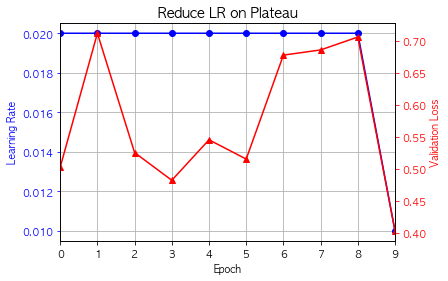

In [329]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [333]:
import math

In [334]:
### 1 Cycle
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [335]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Epoch 1/5
430/430 [==============================] - 2s 4ms/step - loss: 2.7198 - accuracy: 0.1855
Epoch 2/5
430/430 [==============================] - 2s 4ms/step - loss: 1.2132 - accuracy: 0.5939
Epoch 3/5
430/430 [==============================] - 2s 5ms/step - loss: 0.5722 - accuracy: 0.7990
Epoch 4/5
430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.7507
Epoch 5/5
430/430 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1008


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

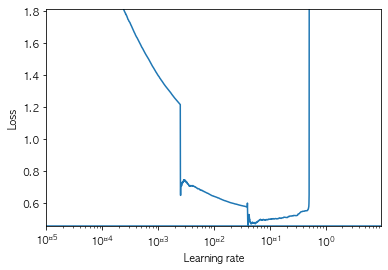

In [336]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=5, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [337]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [339]:
n_epochs = 10
onecycle = OneCycleScheduler(math.ceil(len(x_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 0.6415 - accuracy: 0.7788 - val_loss: 0.4721 - val_accuracy: 0.8398
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4360 - accuracy: 0.8480 - val_loss: 0.4166 - val_accuracy: 0.8570
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.3922 - accuracy: 0.8603 - val_loss: 0.4089 - val_accuracy: 0.8570
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.3635 - accuracy: 0.8705 - val_loss: 0.3777 - val_accuracy: 0.8684
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3419 - accuracy: 0.8777 - val_loss: 0.3599 - val_accuracy: 0.8710
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3092 - accuracy: 0.8895 - val_loss: 0.3447 - val_accuracy: 0.8820
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.2862 - accuracy: 0.8976 - val_loss: 0.3361 - val_accuracy: 0.8818
Epoch 

#### Penalty
- Overfitting 방지

##### $\ell_1$ and $\ell_2$

In [340]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 5ms/step - loss: 1.6156 - accuracy: 0.8140 - val_loss: 0.7035 - val_accuracy: 0.8388
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7182 - accuracy: 0.8275 - val_loss: 0.6920 - val_accuracy: 0.8348


In [341]:
from functools import partial

In [342]:
RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 4ms/step - loss: 1.5951 - accuracy: 0.8140 - val_loss: 0.7041 - val_accuracy: 0.8374
Epoch 2/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7216 - accuracy: 0.8257 - val_loss: 0.6942 - val_accuracy: 0.8302


##### Dropout
- 노드 드롭
- 일반적으로 맨 위부터 세번째 층까지 적용
- AlphaDropout: SELU가 activation function인 경우

In [343]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5738 - accuracy: 0.8042 - val_loss: 0.3715 - val_accuracy: 0.8658
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4254 - accuracy: 0.8453 - val_loss: 0.3500 - val_accuracy: 0.8680


In [344]:
### Alpha dropout
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6638 - accuracy: 0.7588 - val_loss: 0.5791 - val_accuracy: 0.8418
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5593 - accuracy: 0.7912 - val_loss: 0.5566 - val_accuracy: 0.8440
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5233 - accuracy: 0.8056 - val_loss: 0.4992 - val_accuracy: 0.8532
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5056 - accuracy: 0.8139 - val_loss: 0.4655 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4912 - accuracy: 0.8179 - val_loss: 0.4537 - val_accuracy: 0.8592
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4822 - accuracy: 0.8228 - val_loss: 0.4702 - val_accuracy: 0.8616
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4711 - accuracy: 0.8253 - val_loss: 0.5061 - val_accuracy:

In [345]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.8566


[0.4816378355026245, 0.8565999865531921]

In [346]:
model.evaluate(x_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8709


[0.39278534054756165, 0.8709454536437988]

In [347]:
### Monte Carlo(MC) dropout
# 성능 향상, 더 정확한 불확실성 추정
# 위험에 민감한 경우 사용
# 예측 속도 저하 있음
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [348]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [349]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [350]:
mc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)              0

In [351]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [352]:
mc_model.set_weights(model.get_weights())

In [ ]:
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis=0), 2)

##### Max-Norm
- 각각의 연결 가중치가 r 미만이 되도록 규제

In [354]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [355]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 6ms/step - loss: 0.4729 - accuracy: 0.8339 - val_loss: 0.3612 - val_accuracy: 0.8658
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3579 - accuracy: 0.8695 - val_loss: 0.3934 - val_accuracy: 0.8598
